In [ ]:
import scipy.io
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
df_normal_45 = pd.read_csv('/content/ADXL345/normal 45hz.csv')
df_normal_60 = pd.read_csv('/content/ADXL345/normal 60hz.csv')
df_normal_75 = pd.read_csv('/content/ADXL345/normal 75hz.csv')
df_normal_90 = pd.read_csv('/content/ADXL345/normal 90hz.csv')
df_rolo_45 = pd.read_csv('/content/ADXL345/Defeito de rolo 45hz.csv')
df_rolo_60 = pd.read_csv('/content/ADXL345/Defeito de rolo 60hz.csv')
df_rolo_75 = pd.read_csv('/content/ADXL345/Defeito de rolo 75hz.csv')
df_rolo_90 = pd.read_csv('/content/ADXL345/Defeito de rolo 90hz.csv')
df_pista_45 = pd.read_csv('/content/ADXL345/Defeito de pista 45hz.csv')
df_pista_60 = pd.read_csv('/content/ADXL345/Defeito de pista 60hz.csv')
df_pista_75 = pd.read_csv('/content/ADXL345/Defeito de pista 75hz.csv')
df_pista_90 = pd.read_csv('/content/ADXL345/Defeito de pista 90hz.csv')

data_frame = [df_normal_45, df_normal_60, df_normal_75, df_normal_90,
              df_rolo_45, df_rolo_60, df_rolo_75, df_rolo_90,
              df_pista_45, df_pista_60, df_pista_75, df_pista_90,
             ]
data_title = ['condição normal 27,8 RPM', 'condição normal 36,7 RPM', 'condição normal 46,0 RPM', 'condição normal 54,8 RPM',
              'defeito de rolo 27,8 RPM', 'defeito de rolo 36,7 RPM', 'defeito de rolo 46,0 RPM', 'defeito de rolo 54,8 RPM',
              'defeito de pista externa 27,8 RPM', 'defeito de pista externa 36,7 RPM', 'defeito de pista externa 46,0 RPM', 'defeito de pista externa 54,8 RPM',
             ]

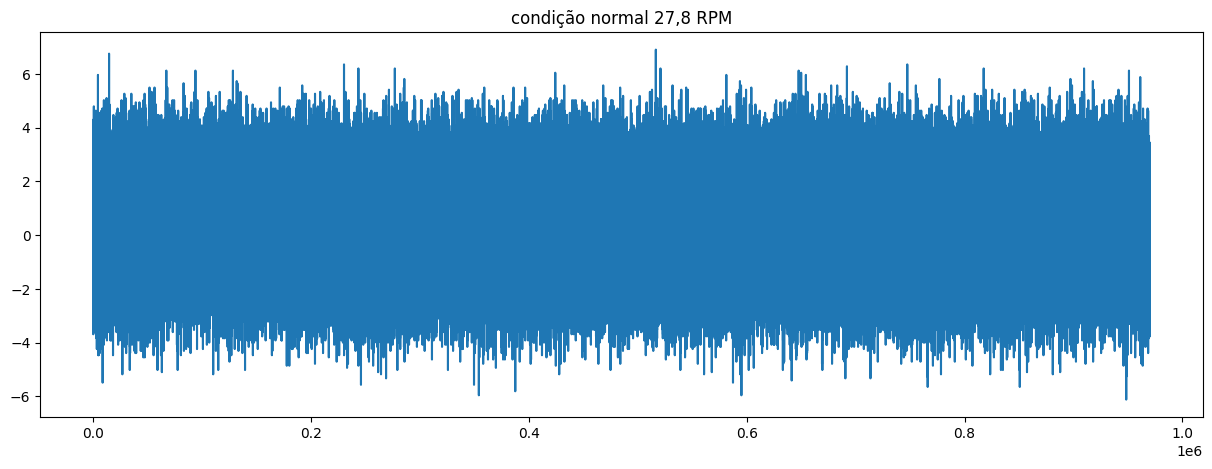

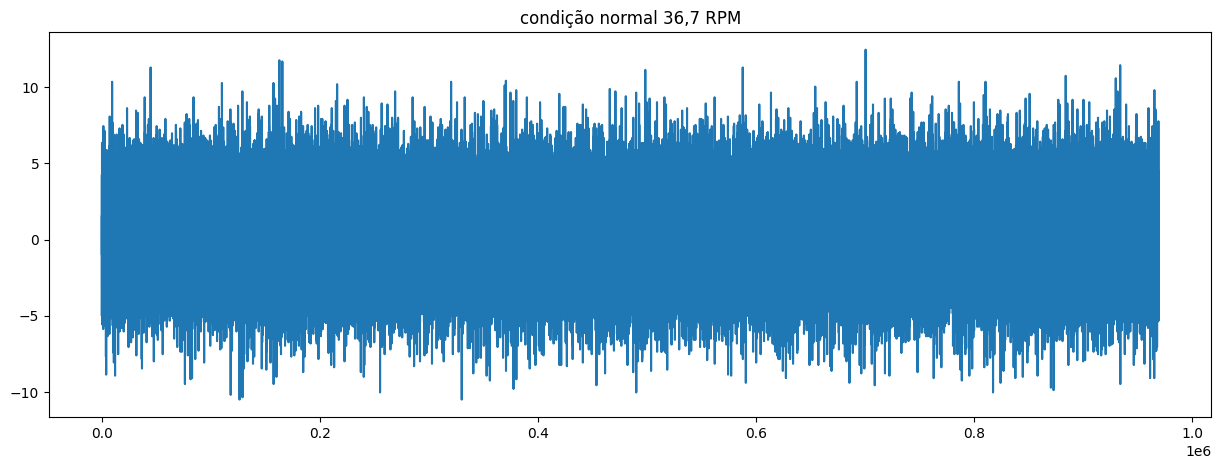

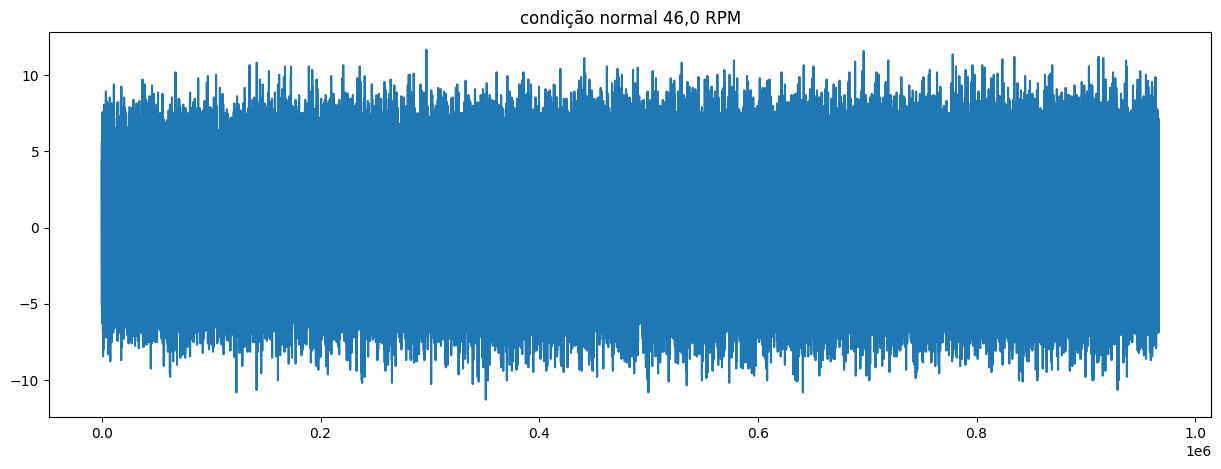

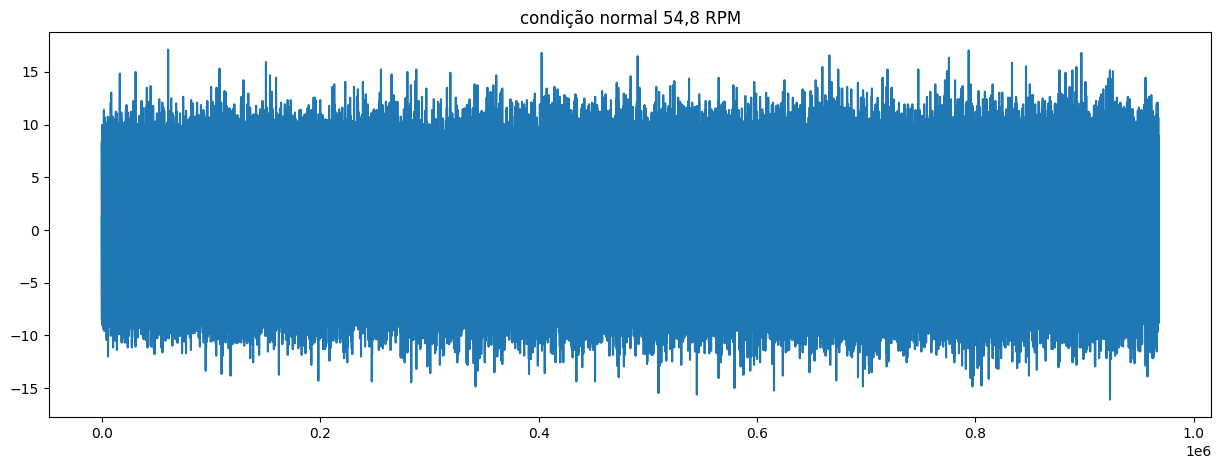

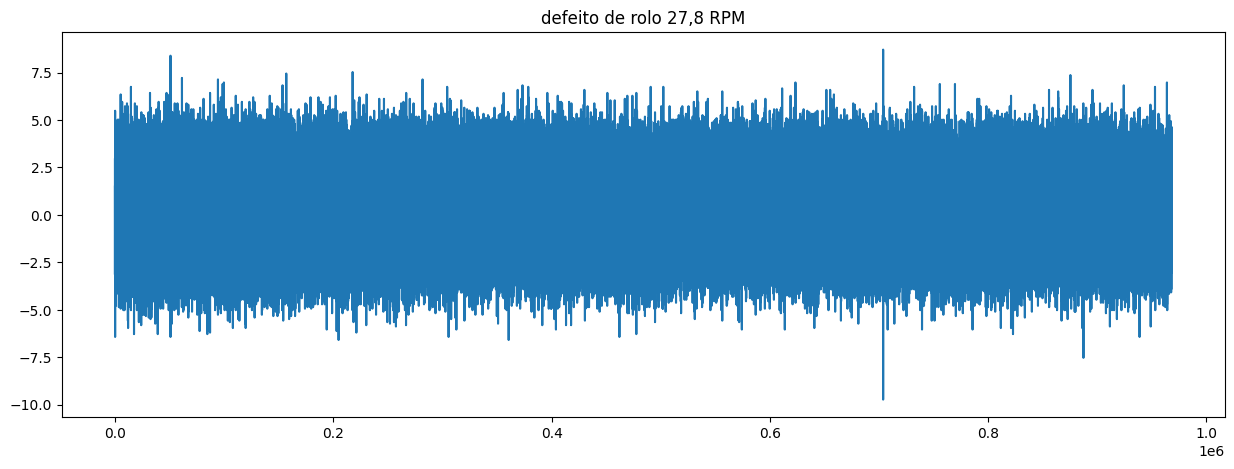

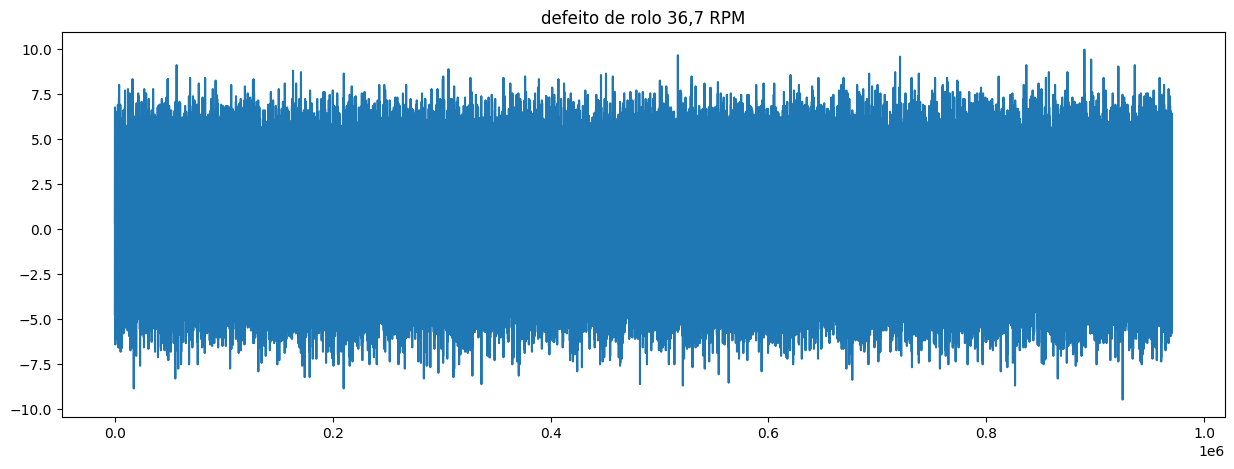

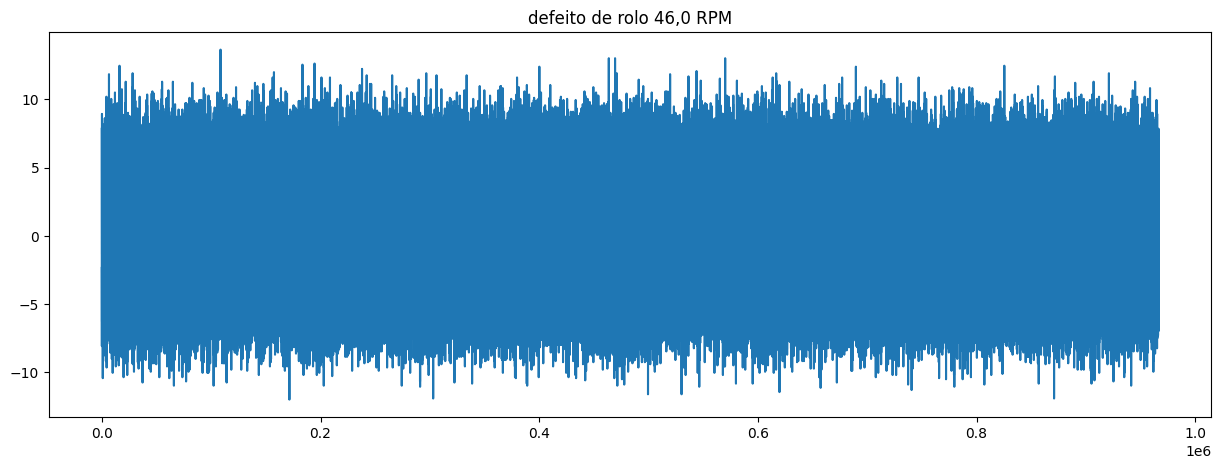

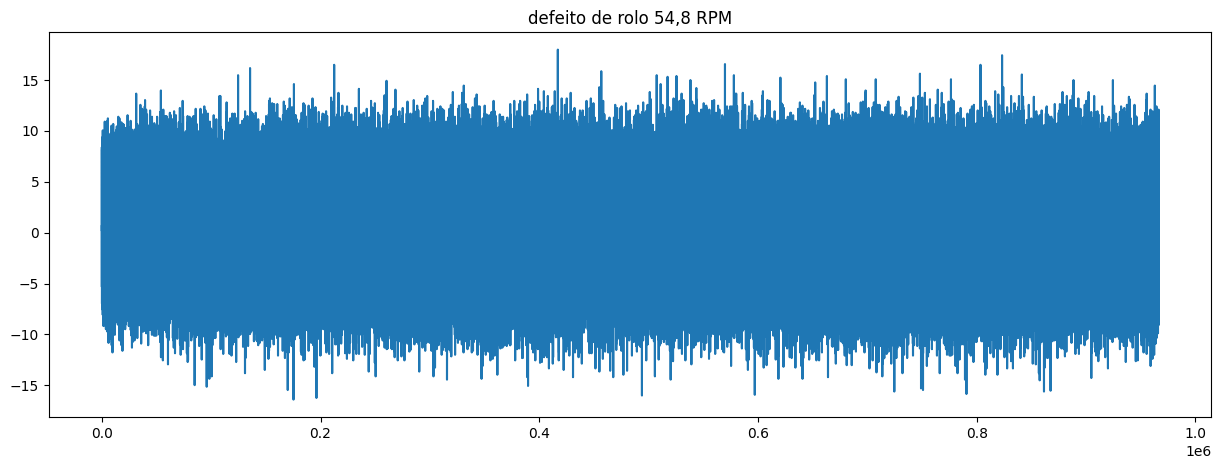

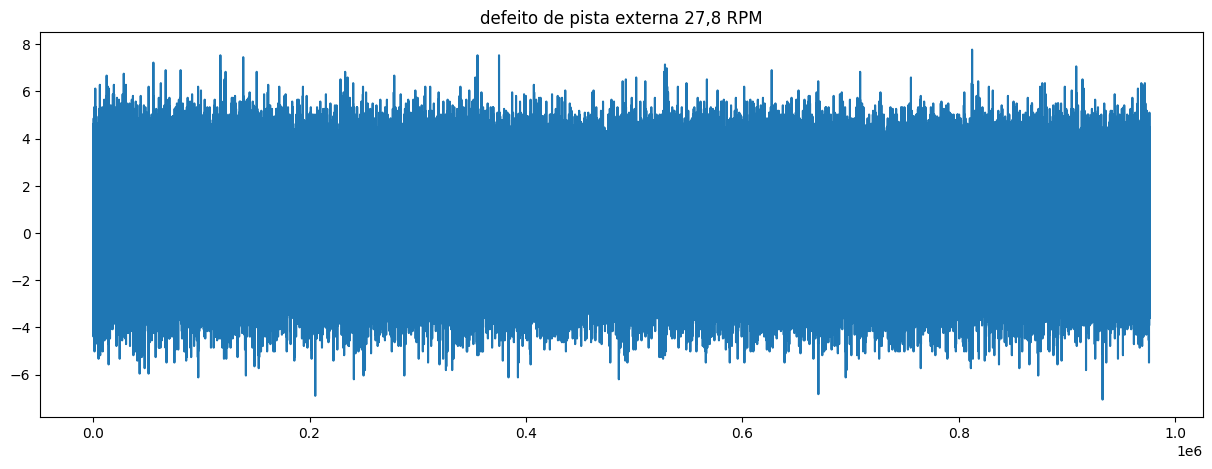

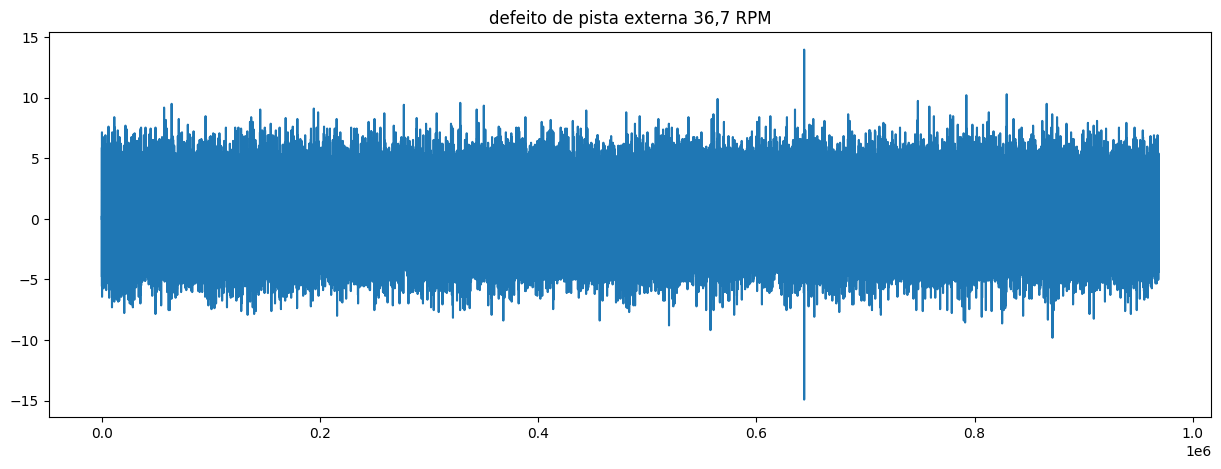

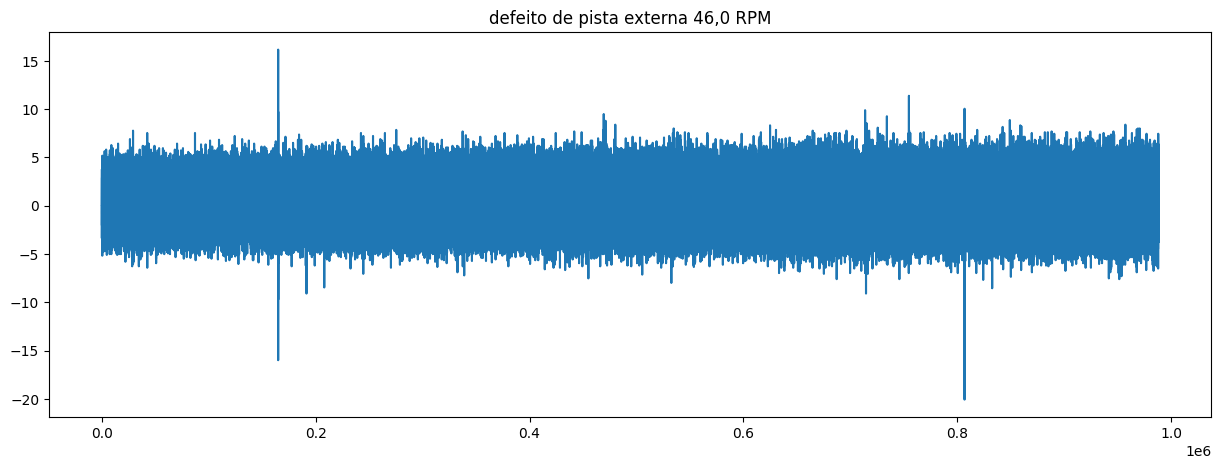

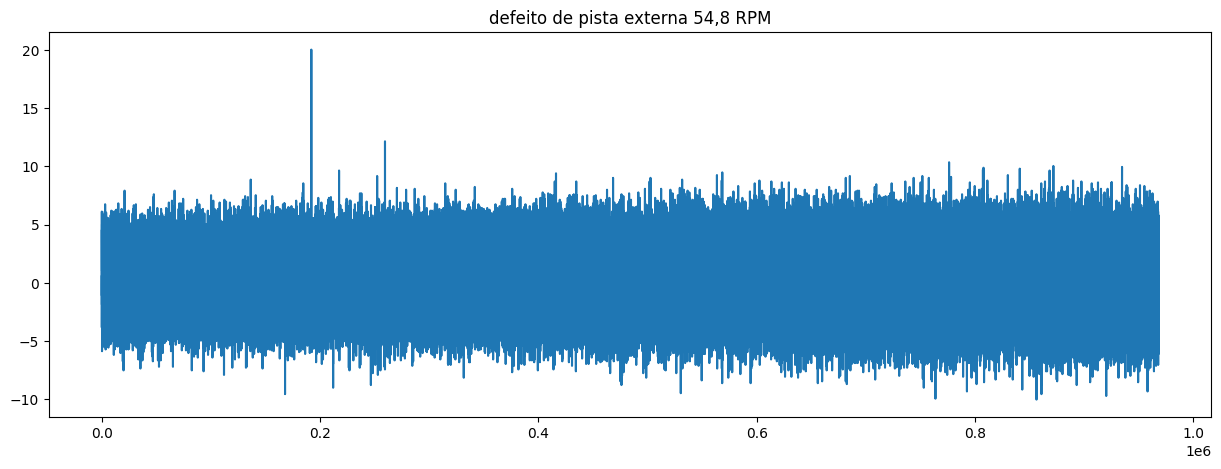

In [ ]:
#printando os gráficos temporais dos sinais aquisitados
for i in range(len(data_frame)):
  print()
  plt.figure(figsize=(15,5))
  plt.plot(data_frame[i].iloc[:,0])
  plt.title(data_title[i])
  plt.show()

In [ ]:
# Agrupando os dados csv
df = pd.concat(
    map(pd.read_csv, ['/content/ADXL345/normal 45hz.csv','/content/ADXL345/normal 60hz.csv','/content/ADXL345/normal 75hz.csv','/content/ADXL345/normal 90hz.csv',
                      '/content/ADXL345/Defeito de rolo 45hz.csv','/content/ADXL345/Defeito de rolo 60hz.csv','/content/ADXL345/Defeito de rolo 75hz.csv','/content/ADXL345/Defeito de rolo 90hz.csv',
                      '/content/ADXL345/Defeito de pista 45hz.csv','/content/ADXL345/Defeito de pista 60hz.csv','/content/ADXL345/Defeito de pista 75hz.csv','/content/ADXL345/Defeito de pista 90hz.csv'
                      ]), ignore_index=True)
print(df)

          dados falha
0         -0.63     N
1          0.39     N
2          1.02     N
3         -0.08     N
4          1.57     N
...         ...   ...
11646637  -1.88    PE
11646638   0.55    PE
11646639   4.47    PE
11646640  -0.55    PE
11646641  -3.69    PE

[11646642 rows x 2 columns]


In [ ]:
data_frame

[        dados falha
 0       -0.63     N
 1        0.39     N
 2        1.02     N
 3       -0.08     N
 4        1.57     N
 ...       ...   ...
 970084  -1.18     N
 970085   0.00     N
 970086   1.73     N
 970087   0.94     N
 970088   0.47     N
 
 [970089 rows x 2 columns],
         dados falha
 0       -0.94     N
 1        2.20     N
 2        0.86     N
 3        0.86     N
 4        0.63     N
 ...       ...   ...
 969103   0.08     N
 969104  -0.94     N
 969105  -0.08     N
 969106   1.80     N
 969107   0.39     N
 
 [969108 rows x 2 columns],
         dados falha
 0        4.31     N
 1        2.12     N
 2       -1.88     N
 3        0.00     N
 4        2.20     N
 ...       ...   ...
 966486  -1.73     N
 966487  -2.12     N
 966488   2.12     N
 966489   1.18     N
 966490   0.47     N
 
 [966491 rows x 2 columns],
         dados falha
 0        1.26     N
 1       -2.59     N
 2       -3.61     N
 3        3.92     N
 4        0.31     N
 ...       ...   ...
 967793

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=784
stride=500

X=[]
Y=[]


for k in df['falha'].unique():

    df_temp_2 = df[df['falha']==k]

    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])

X=np.array(X)
X=X.reshape((X.shape[0],28,28,1))


Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [ ]:
X.shape

(23290, 28, 28, 1)

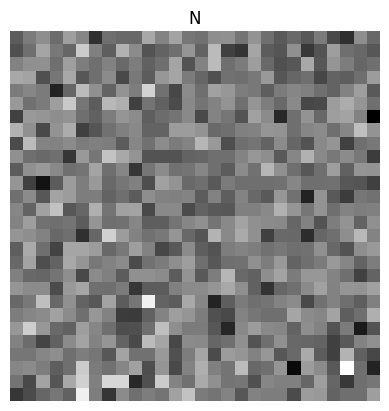

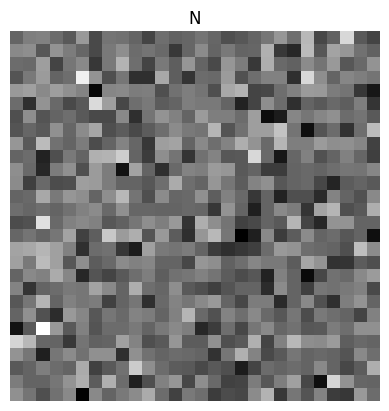

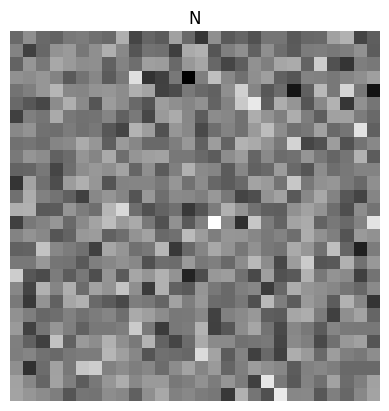

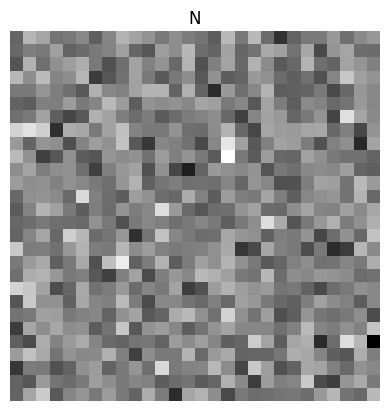

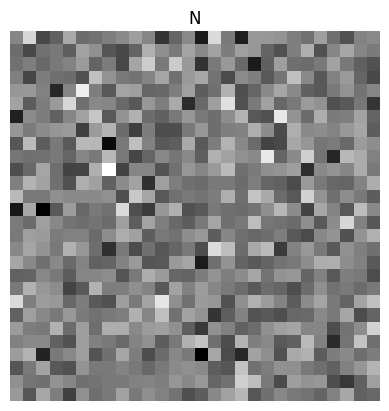

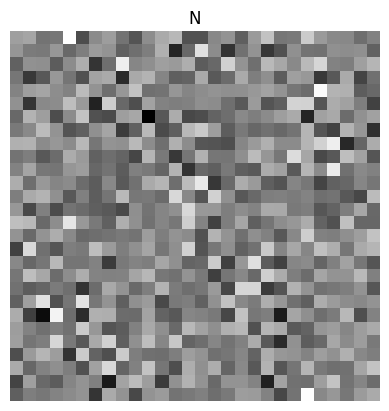

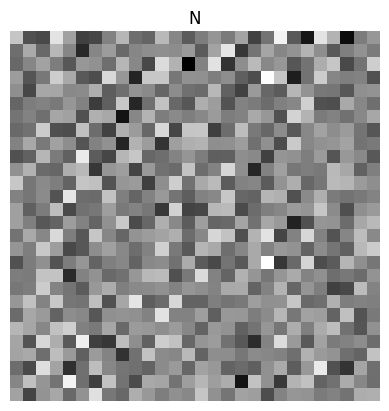

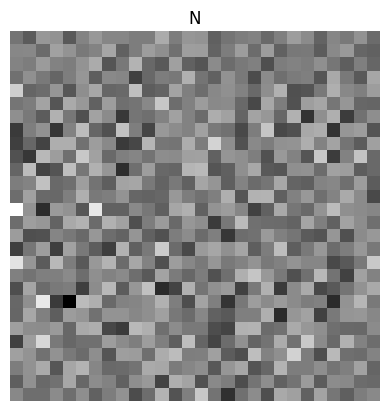

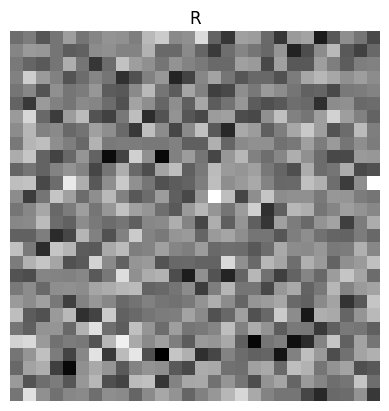

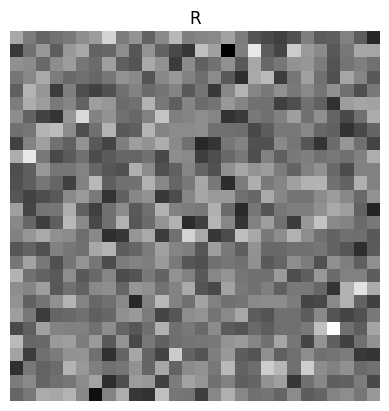

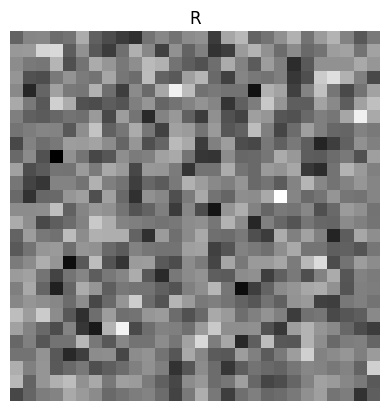

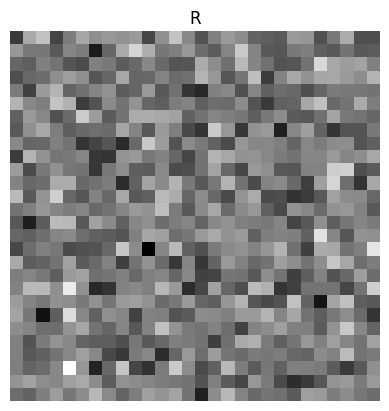

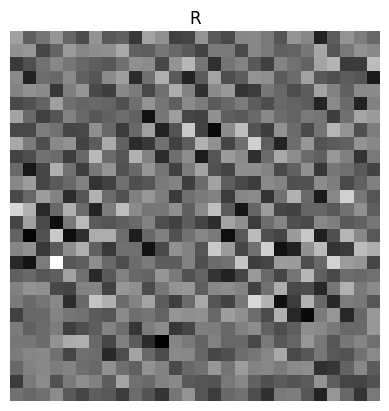

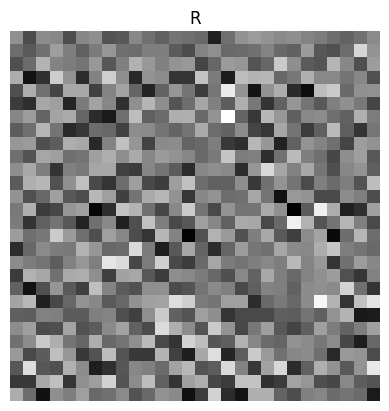

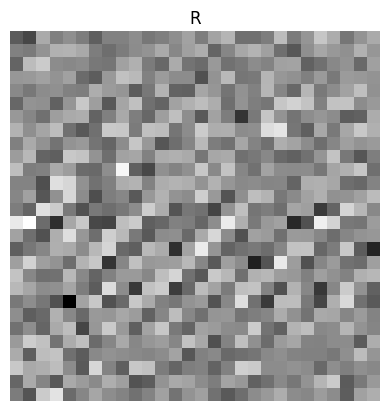

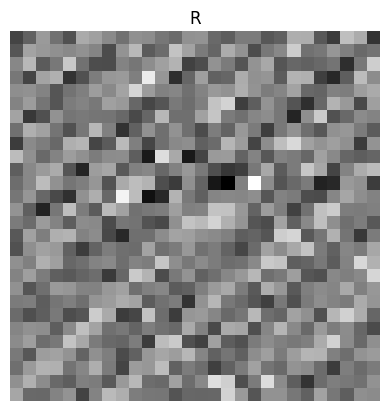

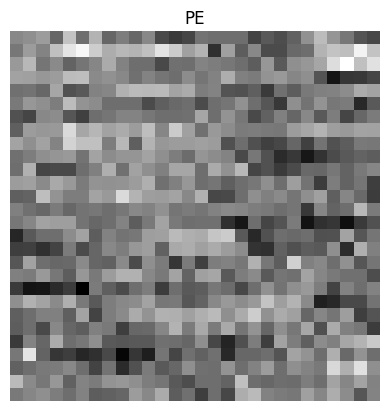

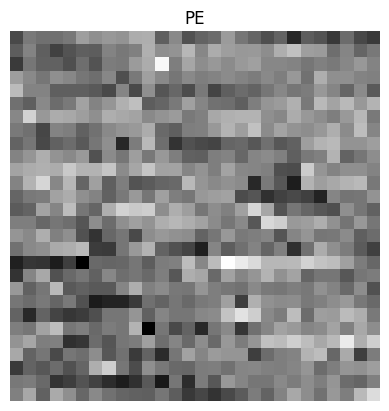

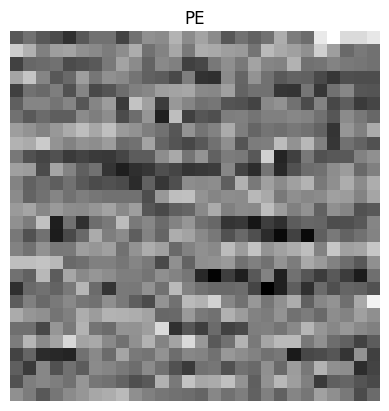

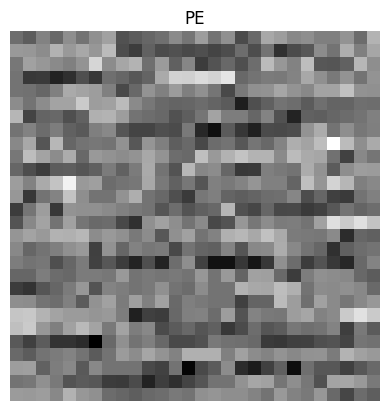

In [ ]:
from matplotlib.pyplot import imread


for idx in range(0,20000,1000):
    img=X[idx]

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(Y[idx])
    plt.show()
    print()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D





no_classes = len(df['falha'].unique())

cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(X.shape[1],X.shape[2],1),padding='same'))

cnn_model.add(MaxPooling2D((2, 2),strides=(2, 2),padding='same'))

cnn_model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))

cnn_model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2),padding='same'))

# cnn_model.add(Conv2D(128, (5, 3), activation='relu',padding='same'))

# cnn_model.add(MaxPooling2D(pool_size=(5, 2),strides=(3, 3),padding='same'))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))

cnn_model.add(Dense(no_classes, activation='softmax'))

cnn_model.summary()

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
batch_size =200
epochs = 20
history = cnn_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/20
82/82 [==============================] - 22s 256ms/step - loss: 0.6260 - accuracy: 0.7449 - val_loss: 0.1264 - val_accuracy: 0.9719
Epoch 2/20
82/82 [==============================] - 23s 285ms/step - loss: 0.0678 - accuracy: 0.9837 - val_loss: 0.0345 - val_accuracy: 0.9946
Epoch 3/20
82/82 [==============================] - 20s 241ms/step - loss: 0.0399 - accuracy: 0.9863 - val_loss: 0.0555 - val_accuracy: 0.9772
Epoch 4/20
82/82 [==============================] - 21s 258ms/step - loss: 0.0214 - accuracy: 0.9939 - val_loss: 0.0131 - val_accuracy: 0.9969
Epoch 5/20
82/82 [==============================] - 22s 262ms/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.0107 - val_accuracy: 0.9969
Epoch 6/20
82/82 [==============================] - 20s 244ms/step - loss: 0.0092 - accuracy: 0.9979 - val_loss: 0.0080 - val_accuracy: 0.9977
Epoch 7/20
82/82 [==============================] - 22s 271ms/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.0071 - val_accuracy: 0.9976

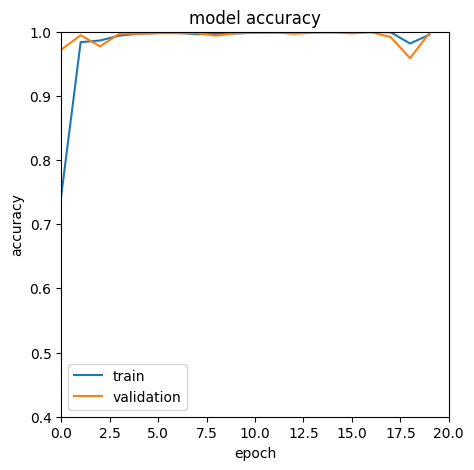

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.xlim([0,20])
plt.ylim([0.4,1.0])
plt.show()

In [ ]:
print("Train data: ", cnn_model.evaluate(X_train, y_train)[1])
print("Test data: ", cnn_model.evaluate(X_test,y_test)[1])

510/510 [==============================] - 8s 15ms/step - loss: 0.0050 - accuracy: 0.9991
Train data:  0.999141275882721
219/219 [==============================] - 3s 12ms/step - loss: 0.0074 - accuracy: 0.9979
Test data:  0.99785315990448


219/219 [==============================] - 3s 14ms/step


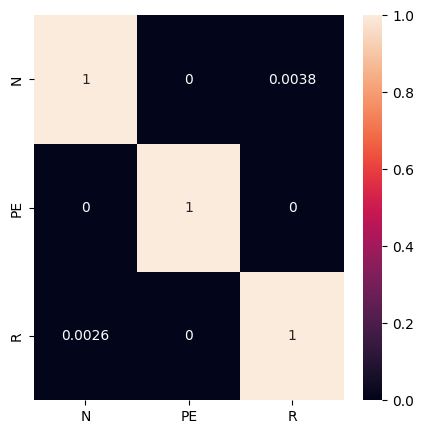

In [ ]:
def inv_Transform_result(y_pred):
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred



y_pred=cnn_model.predict(X_test)


Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(5,5))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=484
stride=390

X=[]
Y=[]


for k in df['falha'].unique():

    df_temp_2 = df[df['falha']==k]

    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])

X=np.array(X)
X=X.reshape((X.shape[0],22,22,1))


Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [ ]:
X.shape

(29861, 22, 22, 1)

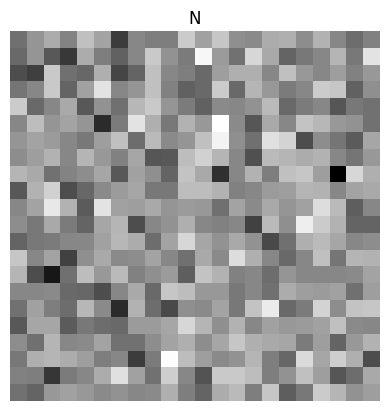

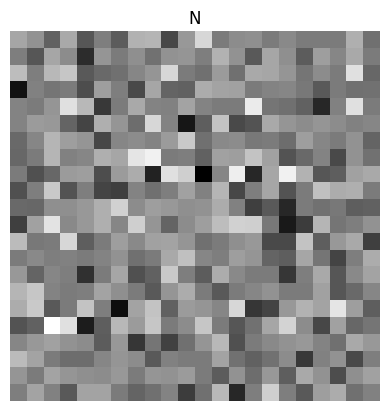

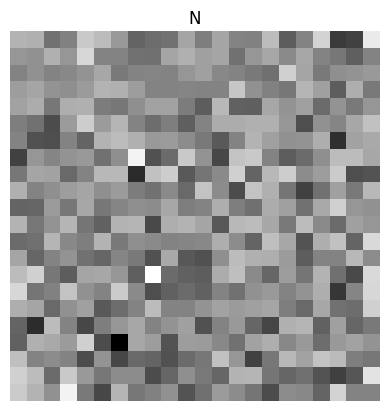

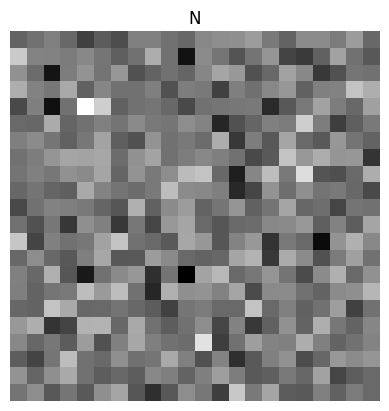

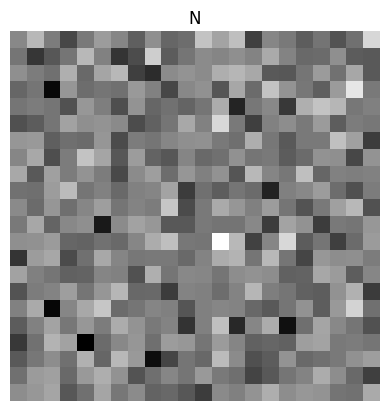

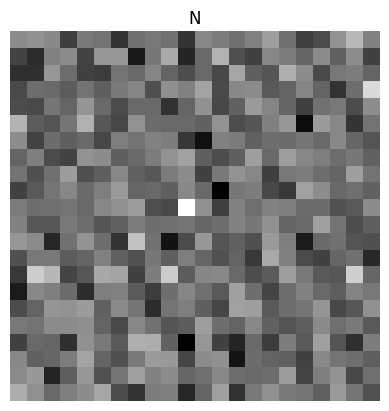

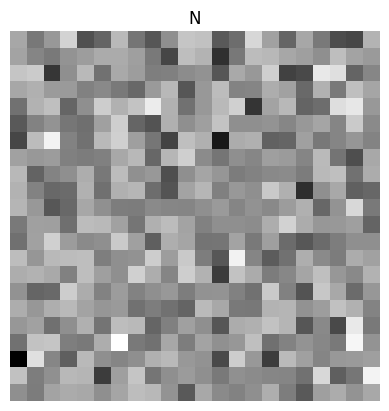

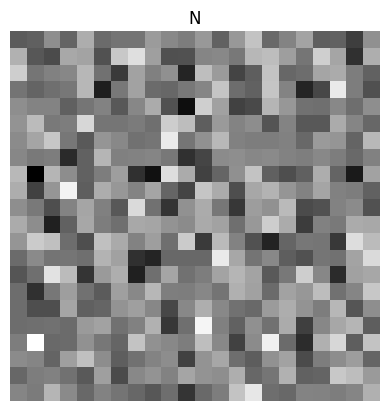

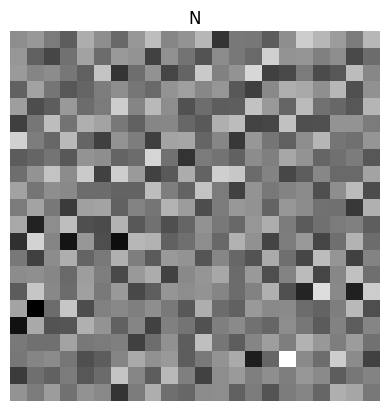

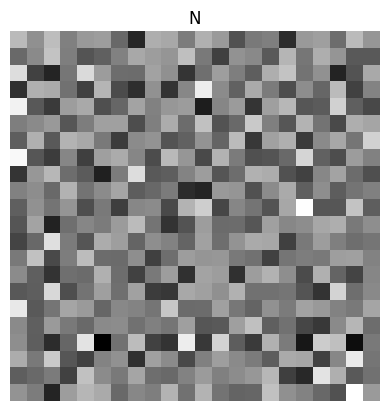

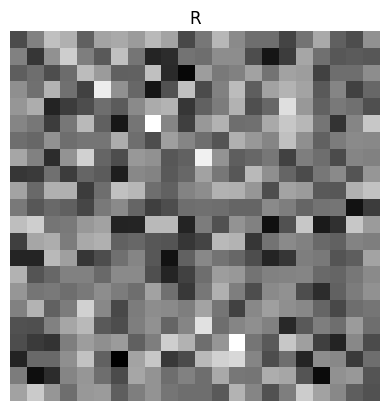

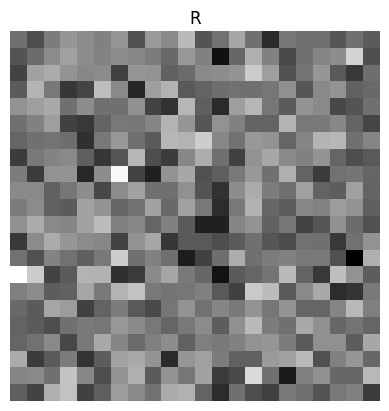

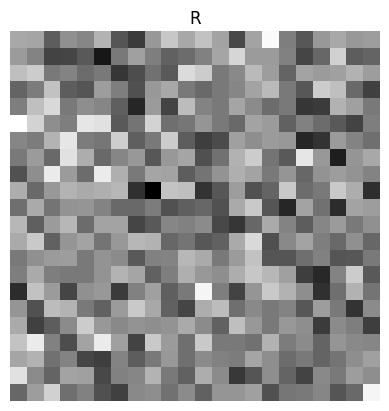

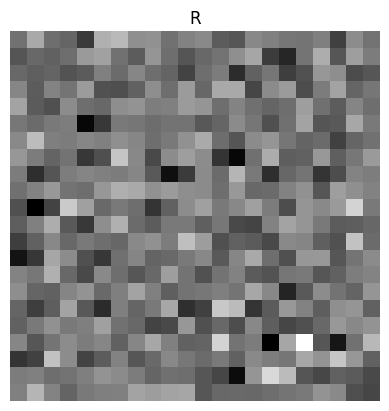

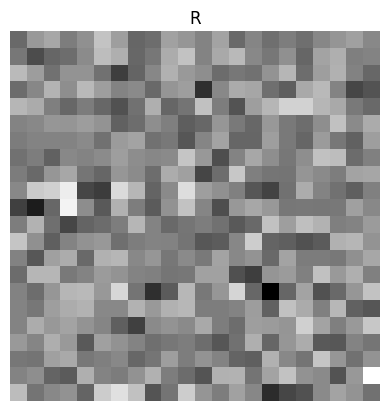

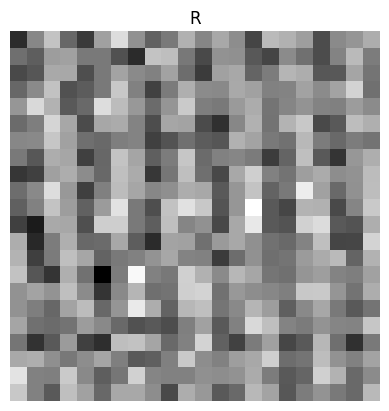

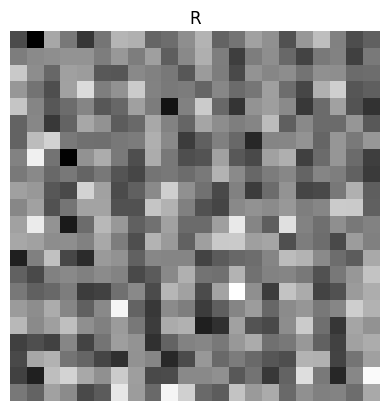

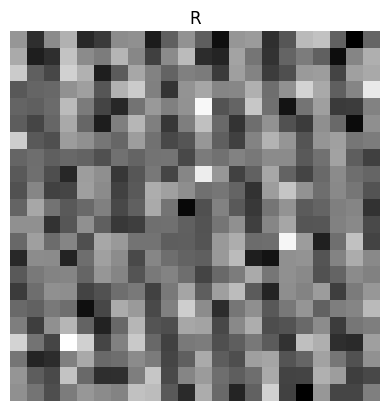

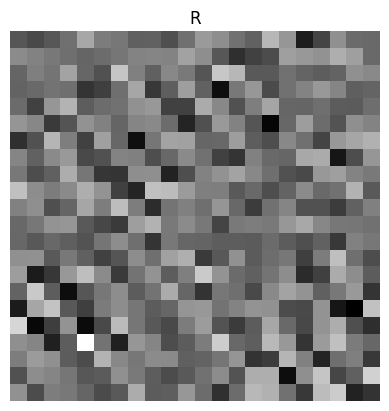

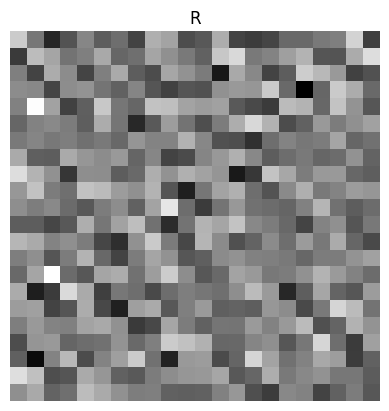

In [ ]:
from matplotlib.pyplot import imread


for idx in range(0,20000,1000):
    img=X[idx]

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(Y[idx])
    plt.show()
    print()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D





no_classes = len(df['falha'].unique())

cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(X.shape[1],X.shape[2],1),padding='same'))

cnn_model.add(MaxPooling2D((2, 2),strides=(2, 2),padding='same'))

cnn_model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))

cnn_model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2),padding='same'))

# cnn_model.add(Conv2D(128, (5, 3), activation='relu',padding='same'))

# cnn_model.add(MaxPooling2D(pool_size=(5, 2),strides=(3, 3),padding='same'))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))

cnn_model.add(Dense(no_classes, activation='softmax'))

cnn_model.summary()

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
batch_size =200
epochs = 20
history = cnn_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/20
105/105 [==============================] - 19s 172ms/step - loss: 0.4357 - accuracy: 0.8145 - val_loss: 0.0902 - val_accuracy: 0.9752
Epoch 2/20
105/105 [==============================] - 17s 160ms/step - loss: 0.0567 - accuracy: 0.9837 - val_loss: 0.0522 - val_accuracy: 0.9802
Epoch 3/20
105/105 [==============================] - 20s 190ms/step - loss: 0.0366 - accuracy: 0.9876 - val_loss: 0.0262 - val_accuracy: 0.9924
Epoch 4/20
105/105 [==============================] - 18s 170ms/step - loss: 0.0198 - accuracy: 0.9935 - val_loss: 0.0180 - val_accuracy: 0.9936
Epoch 5/20
105/105 [==============================] - 18s 169ms/step - loss: 0.0159 - accuracy: 0.9944 - val_loss: 0.0143 - val_accuracy: 0.9949
Epoch 6/20
105/105 [==============================] - 18s 171ms/step - loss: 0.0160 - accuracy: 0.9941 - val_loss: 0.0131 - val_accuracy: 0.9956
Epoch 7/20
105/105 [==============================] - 19s 181ms/step - loss: 0.0117 - accuracy: 0.9956 - val_loss: 0.0109 - val_ac

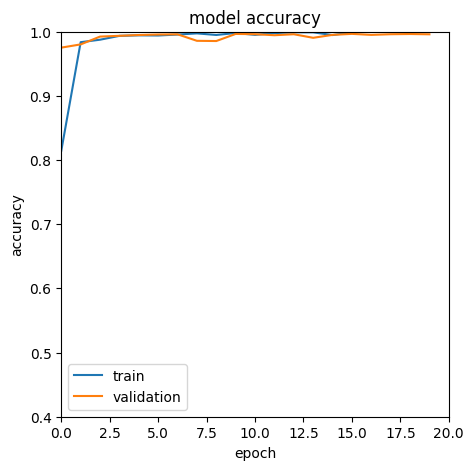

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.xlim([0,20])
plt.ylim([0.4,1.0])
plt.show()

In [ ]:
print("Train data: ", cnn_model.evaluate(X_train, y_train)[1])
print("Test data: ", cnn_model.evaluate(X_test,y_test)[1])

654/654 [==============================] - 5s 8ms/step - loss: 0.0010 - accuracy: 1.0000
Train data:  1.0
280/280 [==============================] - 4s 13ms/step - loss: 0.0106 - accuracy: 0.9960
Test data:  0.9959816932678223


280/280 [==============================] - 2s 8ms/step


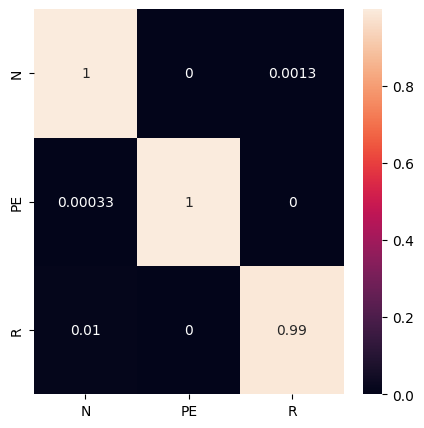

In [ ]:
def inv_Transform_result(y_pred):
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred



y_pred=cnn_model.predict(X_test)


Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(5,5))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=256
stride=200

X=[]
Y=[]


for k in df['falha'].unique():

    df_temp_2 = df[df['falha']==k]

    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])

X=np.array(X)
X=X.reshape((X.shape[0],16,16,1))


Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [ ]:
X.shape

(58232, 16, 16, 1)

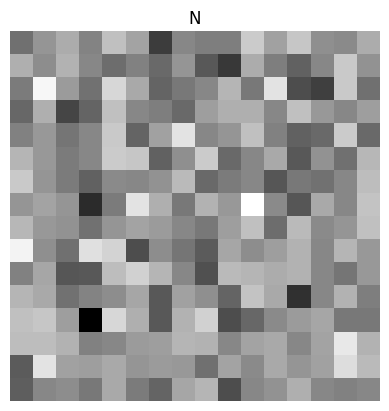

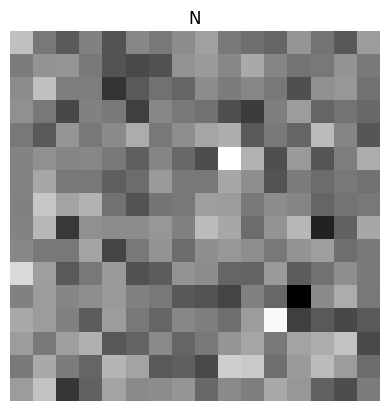

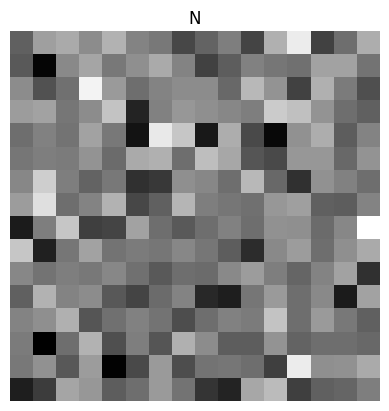

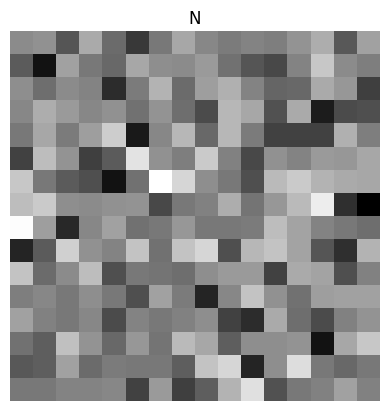

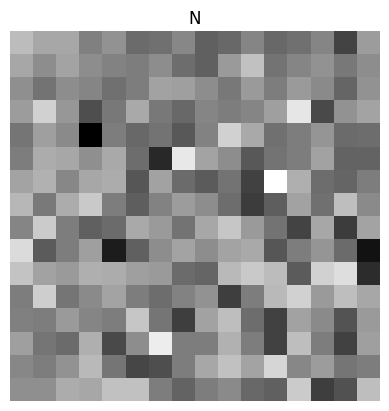

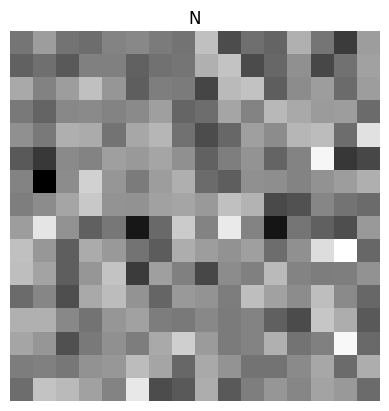

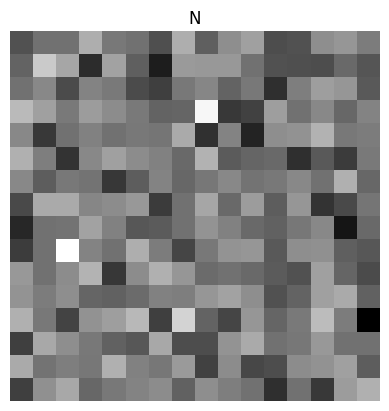

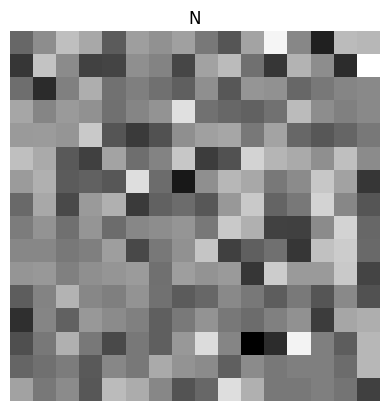

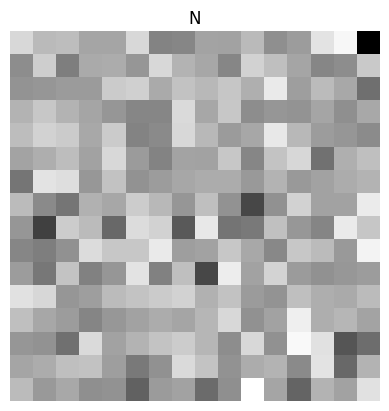

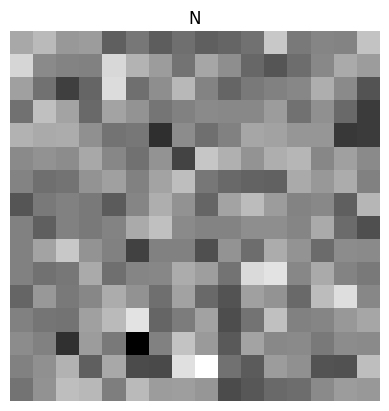

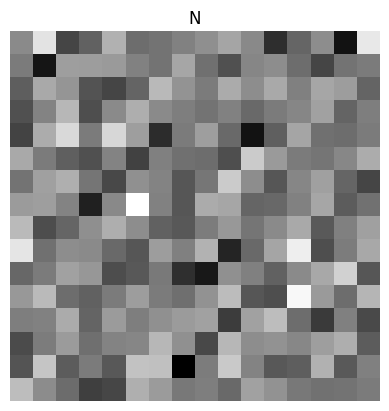

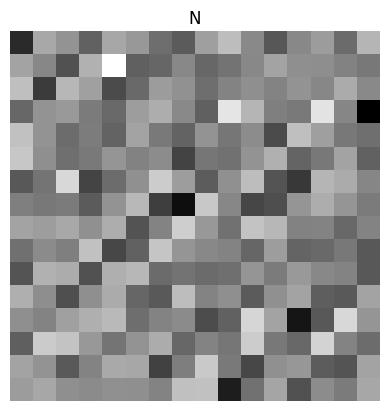

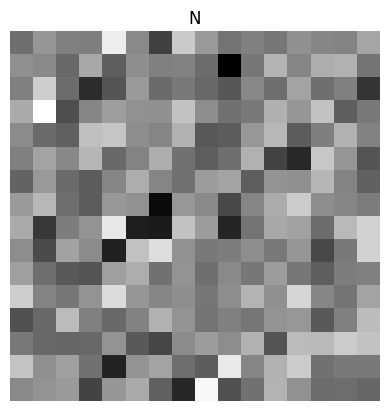

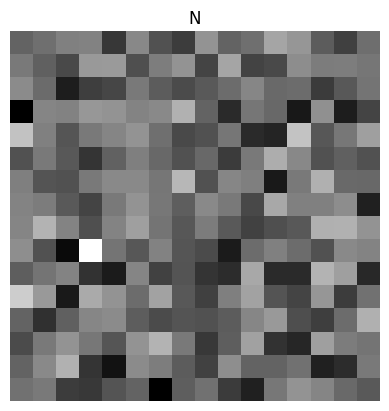

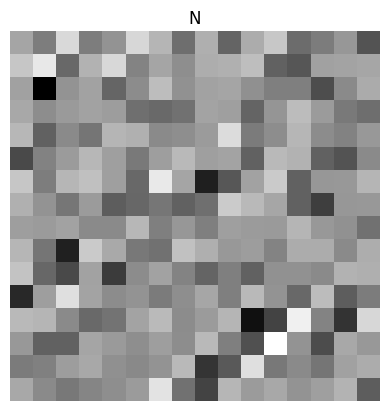

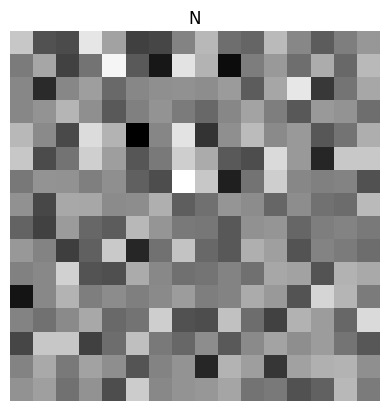

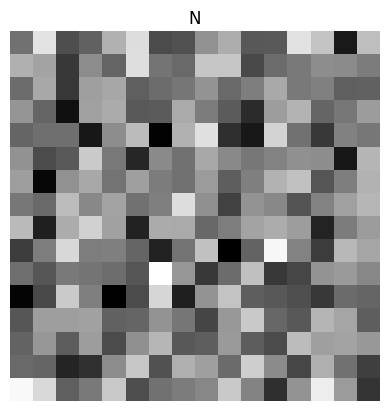

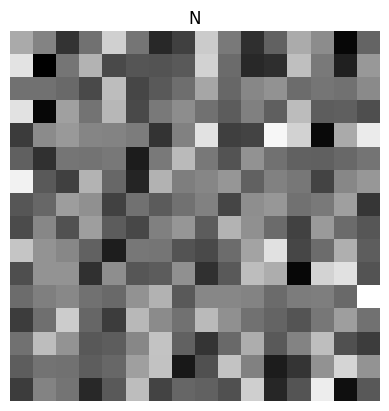

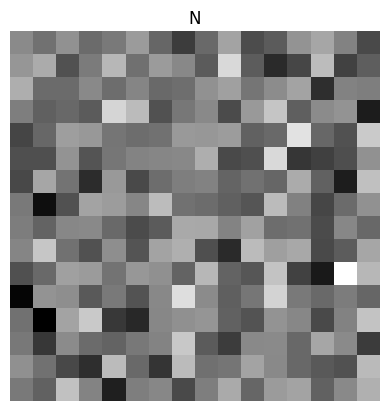

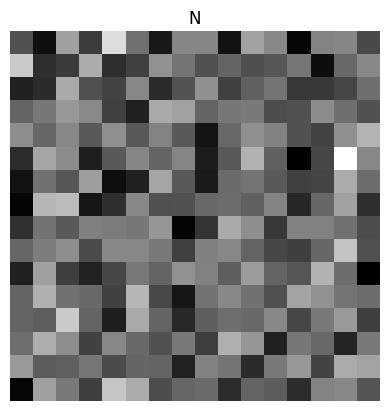

In [ ]:
from matplotlib.pyplot import imread


for idx in range(0,20000,1000):
    img=X[idx]

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(Y[idx])
    plt.show()
    print()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D





no_classes = len(df['falha'].unique())

cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(X.shape[1],X.shape[2],1),padding='same'))

cnn_model.add(MaxPooling2D((2, 2),strides=(2, 2),padding='same'))

cnn_model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))

cnn_model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2),padding='same'))

# cnn_model.add(Conv2D(128, (5, 3), activation='relu',padding='same'))

# cnn_model.add(MaxPooling2D(pool_size=(5, 2),strides=(3, 3),padding='same'))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))

cnn_model.add(Dense(no_classes, activation='softmax'))

cnn_model.summary()

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
batch_size =200
epochs = 20
history = cnn_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/20
204/204 [==============================] - 23s 107ms/step - loss: 0.3471 - accuracy: 0.8344 - val_loss: 0.0954 - val_accuracy: 0.9638
Epoch 2/20
204/204 [==============================] - 19s 92ms/step - loss: 0.0873 - accuracy: 0.9665 - val_loss: 0.0764 - val_accuracy: 0.9707
Epoch 3/20
204/204 [==============================] - 19s 92ms/step - loss: 0.0764 - accuracy: 0.9699 - val_loss: 0.1045 - val_accuracy: 0.9583
Epoch 4/20
204/204 [==============================] - 22s 109ms/step - loss: 0.0660 - accuracy: 0.9741 - val_loss: 0.0582 - val_accuracy: 0.9785
Epoch 5/20
204/204 [==============================] - 19s 93ms/step - loss: 0.0624 - accuracy: 0.9758 - val_loss: 0.0698 - val_accuracy: 0.9738
Epoch 6/20
204/204 [==============================] - 19s 93ms/step - loss: 0.0571 - accuracy: 0.9779 - val_loss: 0.0567 - val_accuracy: 0.9789
Epoch 7/20
204/204 [==============================] - 19s 93ms/step - loss: 0.0470 - accuracy: 0.9814 - val_loss: 0.0692 - val_accurac

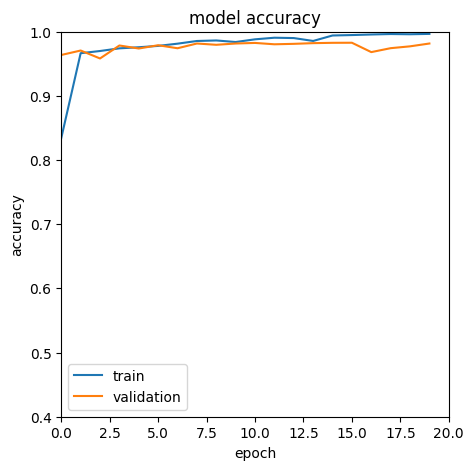

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.xlim([0,20])
plt.ylim([0.4,1.0])
plt.show()

In [ ]:
print("Train data: ", cnn_model.evaluate(X_train, y_train)[1])
print("Test data: ", cnn_model.evaluate(X_test,y_test)[1])

1274/1274 [==============================] - 9s 7ms/step - loss: 0.0136 - accuracy: 0.9960
Train data:  0.9960256814956665
546/546 [==============================] - 3s 6ms/step - loss: 0.0569 - accuracy: 0.9816
Test data:  0.9816256165504456


546/546 [==============================] - 4s 7ms/step


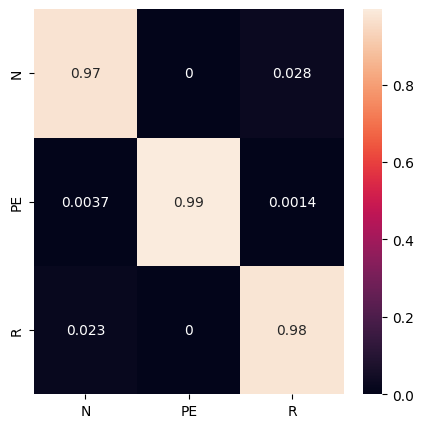

In [ ]:
def inv_Transform_result(y_pred):
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred



y_pred=cnn_model.predict(X_test)


Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(5,5))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()